In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import winsound
import time

In [2]:
# Helper Functions
def fnGenSampledSinusoid(A,Freq,Phi, Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return [n,y]

def fnGenSampledSinusoidInNT(A,Freq,Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    numPts = int((eTime-sTime)*Fs/2)
    n = np.arange(-numPts,numPts)
    Ts = 1/Fs   # sampling period = 1/sampling frequency
    nT = n*Ts   #(1.0/10)
    yNT = A*np.cos(2*np.pi*Freq*nT)
    return [nT,yNT]

def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))

## Question 3.1

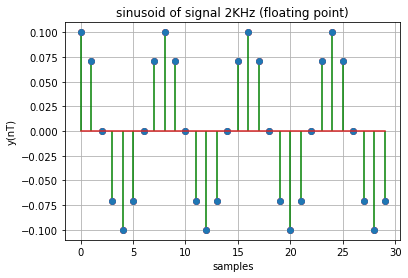

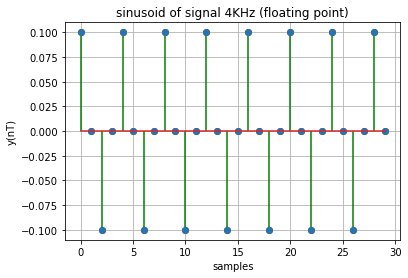

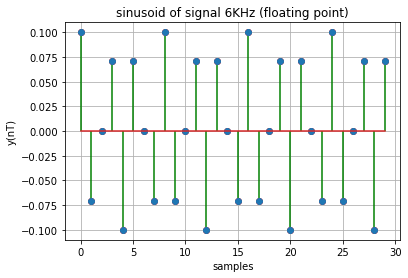

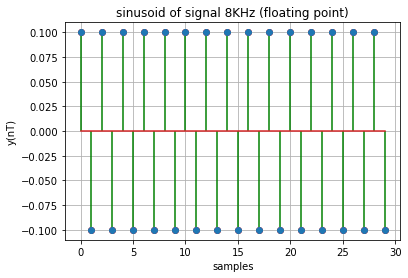

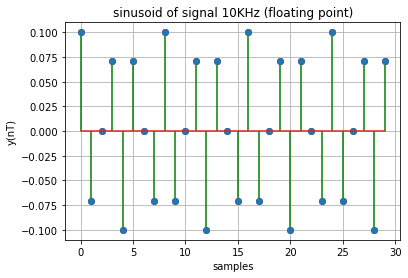

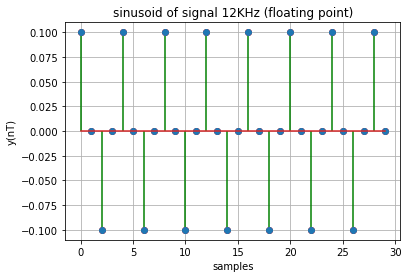

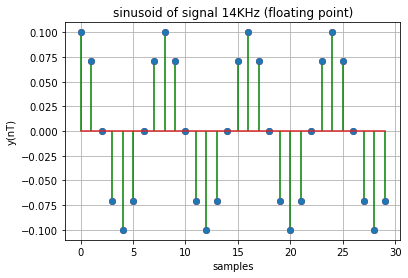

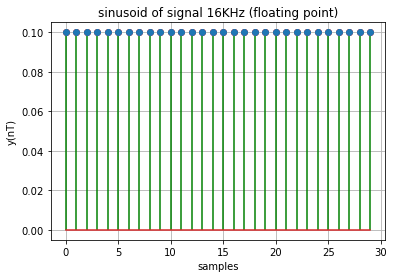

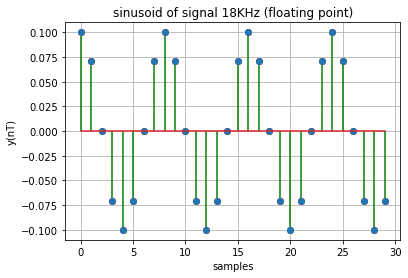

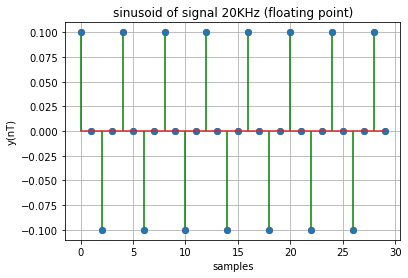

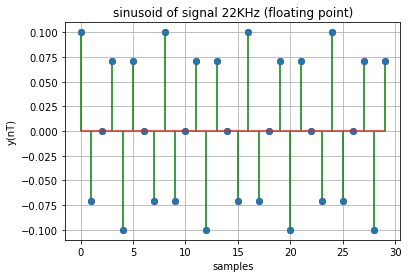

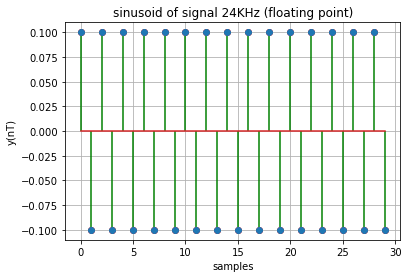

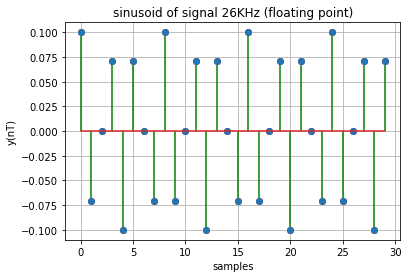

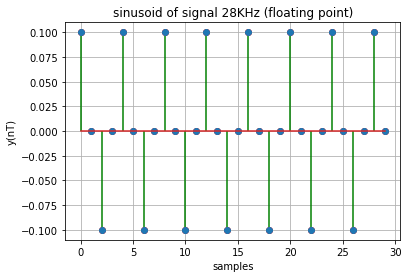

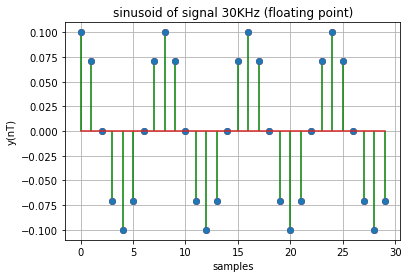

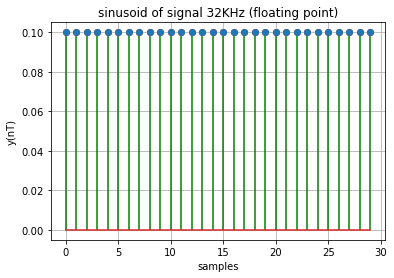

In [3]:
def a_3_1(sampling_f, signal_f, signal_amp, i):
    numPts = 30
    n = np.arange(0,numPts)
    Ts = 1/sampling_f   # sampling period = 1/sampling frequency
    nT = n*Ts   #(1.0/10)
    yNT = signal_amp*np.cos(2*np.pi*signal_f*nT)
    plt.figure(1)
    plt.plot(n, yNT,'ro');
    plt.stem(n, yNT,'g-');
    plt.xlabel('samples'); plt.ylabel('y(nT)')
    plt.title(f'sinusoid of signal {i}KHz (floating point)')
    plt.grid()
    plt.show()

for i in range(2,33,2):
    A=0.1; F=i*1000; Phi = 0; Fs=16000; sTime=0; eTime = 1.4;
    a_3_1(Fs, F, A, i)
    
    [n,yfloat] = fnGenSampledSinusoid(A, F, Phi, Fs, sTime, eTime)
    y_16bit = fnNormalizeFloatTo16Bit(yfloat)

    wavfile.write(f't1_3.1\ques_a_{F}', Fs, y_16bit)

    winsound.PlaySound(f't1_3.1\ques_a_{F}', winsound.SND_FILENAME)
    time.sleep(1)

#### Question 3.1a
Aliasing occurs for signals of frequency more than 10 KHz when sampling frequency is 16KHz. This is consistent with Nyquist Sampling Rate

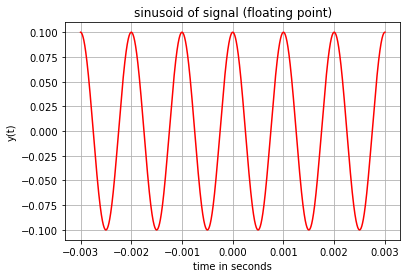

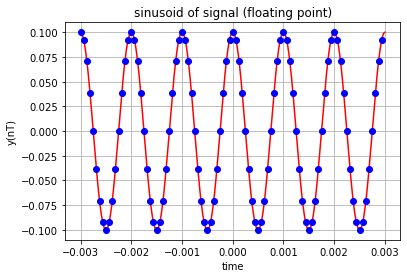

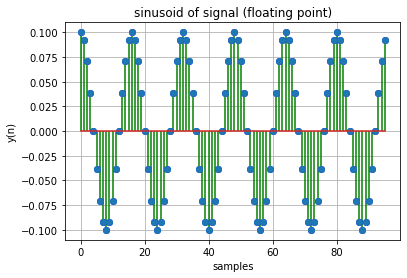

In [4]:
def b_3_1(sampling_f, signal_f, signal_amp, cycles):
    st = -(cycles/2) * (1/signal_f); et = -1*st
    [t,y] = fnGenSampledSinusoid(signal_amp, signal_f, 0, sampling_f*1000, st, et)
    plt.figure(1)
    # plt.stem(t, y,'g-');
    plt.plot(t, y,'r');
    plt.xlabel('time in seconds'); plt.ylabel('y(t)')
    plt.title('sinusoid of signal (floating point)')
    plt.grid()
    plt.show()

    [n, yNT] = fnGenSampledSinusoidInNT(signal_amp, signal_f, sampling_f, st, et)
    plt.figure(2)
    plt.plot(t, y,'r-');
    plt.plot(n, yNT,'bo');
    # plt.stem(n, yNT,'g-');
    plt.xlabel('time'); plt.ylabel('y(nT)')
    plt.title('sinusoid of signal (floating point)')
    plt.grid()
    plt.show()
    
    no_s = np.arange(0,len(n),1)
    plt.figure(3)
    plt.plot(no_s, yNT,'bo');
    plt.stem(no_s, yNT,'g-');
    plt.xlabel('samples'); plt.ylabel('y(n)')
    plt.title('sinusoid of signal (floating point)')
    plt.grid()
    plt.show()
    
b_3_1(16000,1000,0.1,6)

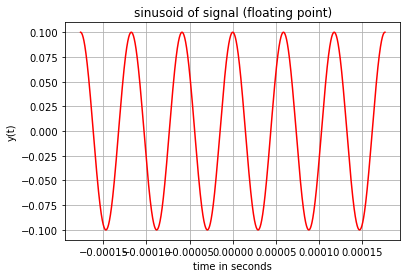

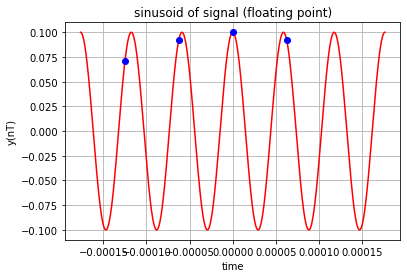

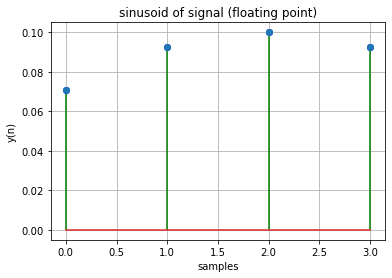

In [5]:
b_3_1(16000,17000,0.1, 6)

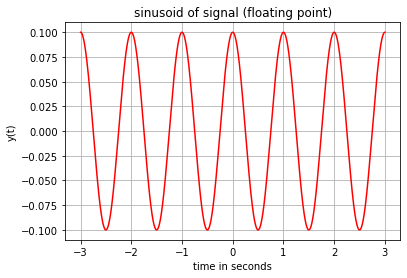

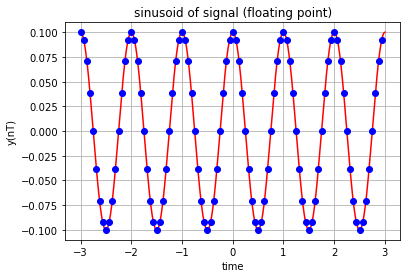

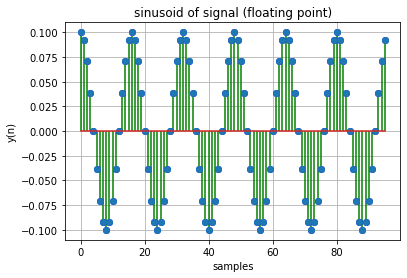

In [6]:
def c_3_1():
    b_3_1(16,1,0.1,6)
    
c_3_1()

# Question 3.2

<img src="DTMF-Frequency-Standards.png" alt="DTMF Frequencies" style="height: 300px; width:300px;"/>

In [8]:
DTMF_FREQ = {'0': [1336, 941],
            '1': [1209, 697],
            '2': [1336, 697],
            '3': [1477, 697],
            '4': [1209, 770],
            '5': [1336, 770],
            '6': [1477, 770],
            '7': [1209, 852],
            '8': [1336, 852],
            '9': [1477, 852],
            '*': [1209, 941],
            '#': [1477, 941],
            'A': [697, 1633],
            'B': [770, 1633],
            'C': [852, 1633],
            'D': [941, 1633]
             }

def fnGenSampledDTMF(seq, Fs, durTone):
    sTime = 0
    eTime = 0 + durTone + 1/Fs
    n = []
    y = []

    for char in seq:
        n = np.arange(sTime, eTime, 1.0/Fs)
        [_,y1] = fnGenSampledSinusoid(0.5, DTMF_FREQ[char][0], 0, Fs, sTime, eTime)
        [_,y2] = fnGenSampledSinusoid(0.5, DTMF_FREQ[char][1], 0, Fs, sTime, eTime)
        y = np.concatenate((y, y1 + y2))

    y_16bit = fnNormalizeFloatTo16Bit(y)
    file_name = 't1_16bit_DTMF.wav'
    wavfile.write(f't1_3.2\seq_{seq}', Fs, y_16bit)

    winsound.PlaySound(f't1_3.2\seq_{seq}', winsound.SND_FILENAME)

fnGenSampledDTMF('1199##96633221996633299663321199##96633221', 3300, 0.4)

# Question 3.3

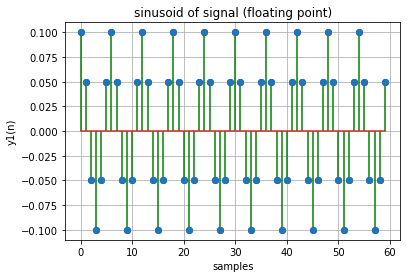

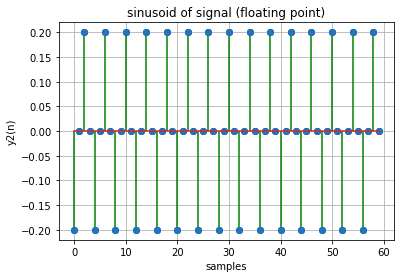

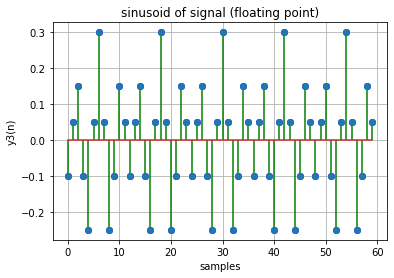

In [9]:
def a_3_3(sampling_f, signal_f, signal_amp, i):
    [n, yNT] = fnGenSampledSinusoidInNT(signal_amp, signal_f, sampling_f, -0.5, 0.5)
    no_s = np.arange(0,len(n),1)
    plt.figure(1)
    plt.plot(no_s, yNT,'bo');
    plt.stem(no_s, yNT,'g-');
    plt.xlabel('samples'); plt.ylabel(f'y{i}(n)')
    plt.title('sinusoid of signal (floating point)')
    plt.grid()
    plt.show()
    return [n, yNT]
    
[n1,y1] = a_3_3(60,10,0.1,1)
[n2,y2] = a_3_3(60,15,0.2,2)
y3 = []
y3 = np.concatenate((y3, y1 + y2))

no_s = np.arange(0,len(n1),1)
plt.figure(1)
plt.plot(no_s, y3,'bo');
plt.stem(no_s, y3,'g-');
plt.xlabel('samples'); plt.ylabel(f'y3(n)')
plt.title('sinusoid of signal (floating point)')
plt.grid()
plt.show()

##### Question 3.3b and 3.3c
Observing above graphs:  
Period of y1[n] is 6 samples  
Period of y2[n] is 4 samples  
Period of y3[n] is 12 samples (Since y3[n] = y1[n] + y2[n], period of y3[n] is LCM of periods of y1[n] and y2[n])

# Question 3.4

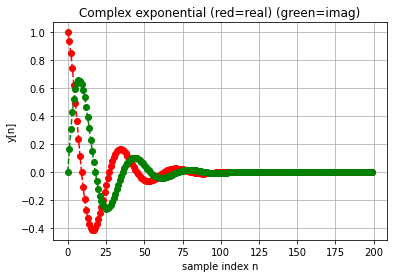

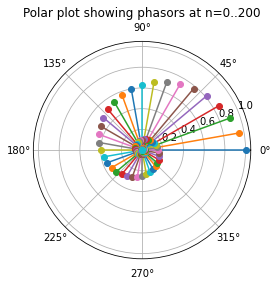

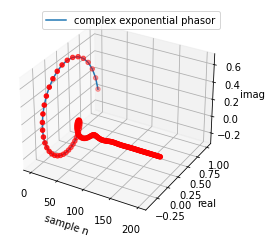

In [10]:
def abc_3_4(A,w,phi):
    numSamples = 200
    n = np.arange(0, numSamples, 1)
    y1 = np.multiply(np.power(A, n), np.exp(1j * w * n + phi))
    
    
    # plotting in 2-D, the real and imag in the same figure
    plt.figure(1)
    plt.plot(n, y1[0:numSamples].real,'r--o')
    plt.plot(n, y1[0:numSamples].imag,'g--o')
    plt.xlabel('sample index n'); plt.ylabel('y[n]')
    plt.title('Complex exponential (red=real) (green=imag)')
    plt.grid()
    plt.show()
    
    # plotting in polar
    plt.figure(2)
    for x in y1:
        plt.polar([0,np.angle(x)],[0,np.abs(x)],marker='o')
    
    plt.title(f'Polar plot showing phasors at n=0..{numSamples}')
    plt.show()
    
    # plotting 3D complex plane
    plt.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    reVal = y1[0:numSamples].real
    imgVal = y1[0:numSamples].imag
    ax.plot(n,reVal, imgVal,  label='complex exponential phasor')
    ax.scatter(n,reVal,imgVal, c='r', marker='o')
    ax.set_xlabel('sample n')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.legend()
    plt.show()
    
abc_3_4(0.95, 2*np.pi/36, 0)

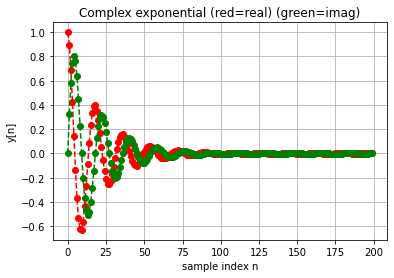

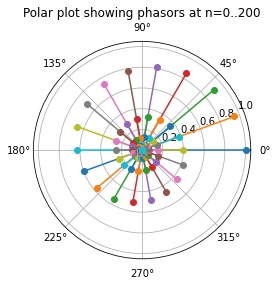

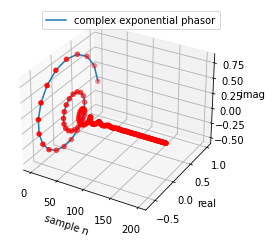

In [11]:
def d_3_4():
    abc_3_4(0.95, 2*np.pi/18, 0)
    
d_3_4()

# Question 3.5

k = 0


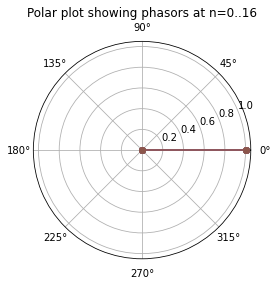

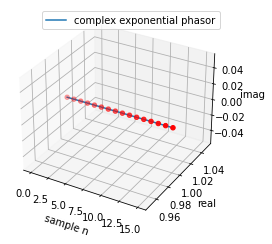

k = 1


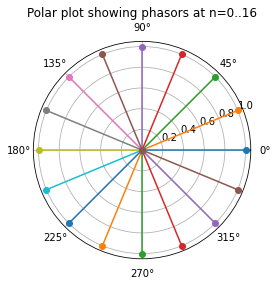

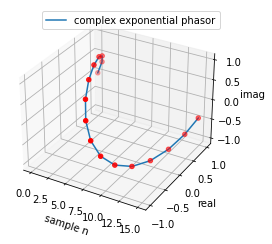

k = 2


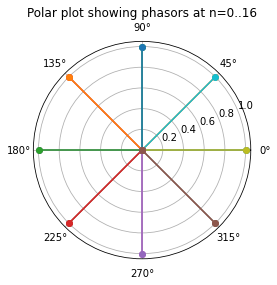

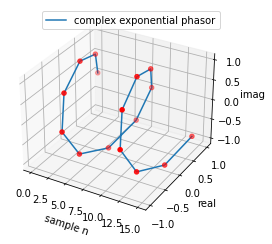

k = 3


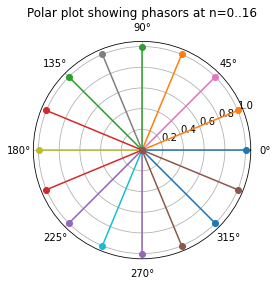

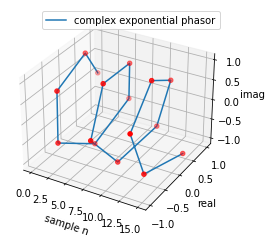

In [18]:
def a_3_5(A,phi,k,N):
    print('k =', k)
    n = np.arange(0, N, 1)
    w = (2*np.pi*k)/N;
    y1 = np.multiply(np.power(A, n), np.exp(1j * w * n + phi))
    
    # plotting in polar
    plt.figure(2)
    for x in y1:
        plt.polar([0,np.angle(x)],[0,np.abs(x)],marker='o')
    
    plt.title(f'Polar plot showing phasors at n=0..{N}')
    plt.show()
        
    # plotting 3D complex plane
    plt.rcParams['legend.fontsize'] = 10
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    reVal = y1[0:N].real
    imgVal = y1[0:N].imag
    ax.plot(n, reVal, imgVal,  label='complex exponential phasor')
    ax.scatter(n,reVal,imgVal, c='r', marker='o')
    ax.set_xlabel('sample n')
    ax.set_ylabel('real')
    ax.set_zlabel('imag')
    ax.legend()
    plt.show()

for k in range(0,4): 
    a_3_5(1, 0, k, 16)

#### Question 3.5b
For k=0, there are no cycles $\rightarrow$ Purely real  
As k increases, number of cycles increases (which is clear in the 3D plots, but not in 2D plots as the spokes are overlapping each other)
Clearly, from the formula, angular frequency is directly proportional to k for constant N. Thus, as k increases angular frequency increases. $$\omega=\frac{2*\pi*k}{16}$$